# Belgian pharmacies

In [2]:
import json
from datetime import datetime

stats = json.load(open("stats.json"))
pharmacies = json.load(open("last-pharmacies.json"))

REGIONS = ["Brussels", "Flanders", "Wallonia"]
# sort stats ASC
convert_2_date = lambda x : datetime.strptime(x, "%d-%m-%Y")
ENTRIES = sorted( [ ( convert_2_date(key), value ) for key, value in stats.items()], key=lambda x: x[0])

## Map of pharmacies

In [5]:
from ipyleaflet import Map, Marker, MarkerCluster, AwesomeIcon, FullScreenControl, SearchControl
from ipywidgets import HTML

center = (50.8503396, 4.3517103) # Brussels
m = Map(center=center)

# Icons
icon_active = AwesomeIcon(name='house-chimney-medical', marker_color='blue', icon_color='darkgreen')
icon_closed = AwesomeIcon(name='house-medical-circle-xmark', marker_color='red', icon_color='darkgreen')

# Create markers
markers = []
for pharmacy in pharmacies:
    icon_state = icon_active if pharmacy["status"].casefold() == "active" else icon_closed
    # TODO later change that trade-off
    geo = pharmacy["geo"][1]
    coords = (geo["latitude"], geo["longitude"])
    name = pharmacy["name"]
    address = pharmacy["textual_address"]
    zipCode = pharmacy["zipCode"]
    municipality = pharmacy["municipality"]
    # Text when clicked on marker
    message = HTML()
    message.value = "<b>{}</b><br>{}<br>{} {}".format(name, address, zipCode, municipality)
    message.placeholder = ""
    message.description = ""
    marker = Marker(location=coords,icon=icon_state, title=name, alt=name, draggable=False)
    marker.popup = message
    markers.append(marker)

marker_cluster = MarkerCluster(markers=markers)
m.add_layer(marker_cluster)
m.add_control(FullScreenControl())
m.add_control(SearchControl(
  position="topleft",
  url='https://nominatim.openstreetmap.org/search?format=json&q={s}',
  zoom=5,
  marker=Marker(icon=AwesomeIcon(name="crosshairs", marker_color='green', icon_color='darkgreen'), draggable=False)
))

m

Map(center=[50.8503396, 4.3517103], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

## Pharmacies by region (most recent data only)

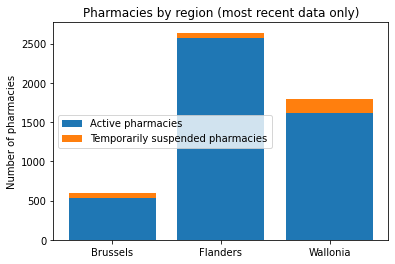

In [6]:
import matplotlib.pyplot as plt

most_recent = ENTRIES[-1]

labels = REGIONS
active_pharmacies = [ most_recent[1][region]["active_pharmacies"] for region in REGIONS]
inactive_pharmacies = [ most_recent[1][region]["temporarily_suspended_pharmacies"] for region in REGIONS]

fig, ax = plt.subplots()

ax.bar(labels, active_pharmacies, label='Active pharmacies')
ax.bar(labels, inactive_pharmacies, bottom=active_pharmacies, label='Temporarily suspended pharmacies')

ax.set_ylabel('Number of pharmacies')
ax.set_title('Pharmacies by region (most recent data only)')
ax.legend()

plt.show()